In [ ]:
## AEP and Capacity factor ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load Data ===
wind_df = pd.read_csv("wind_data.csv")  # Contains 'Wind_Speed_m_s'
vestas_curve = pd.read_csv("vestas_v90_curve.csv")
nordex_curve = pd.read_csv("nordex_n29_curve.csv")

# === Interpolate Power Output ===
vestas_power = np.interp(wind_df["Wind_Speed_m_s"], vestas_curve["Wind_Speed_m_s"], vestas_curve["Power_kW"])
nordex_power = np.interp(wind_df["Wind_Speed_m_s"], nordex_curve["Wind_Speed_m_s"], nordex_curve["Power_kW"])

# === AEP and Capacity Factor ===
aep_vestas = np.sum(vestas_power)
aep_nordex = np.sum(nordex_power)
rated_vestas = 3000  # kW
rated_nordex = 250   # kW
hours = 8760

cf_vestas = (aep_vestas / (rated_vestas * hours)) * 100
cf_nordex = (aep_nordex / (rated_nordex * hours)) * 100

print(f"AEP Vestas: {aep_vestas / 1000:.2f} MWh/year")
print(f"Capacity Factor Vestas: {cf_vestas:.2f}%")
print(f"AEP Nordex: {aep_nordex / 1000:.2f} MWh/year")
print(f"Capacity Factor Nordex: {cf_nordex:.2f}%")



AEP Vestas: 8863.33 MWh/year
Capacity Factor Vestas: 33.73%
AEP Nordex: 1542.97 MWh/year
Capacity Factor Nordex: 70.46%


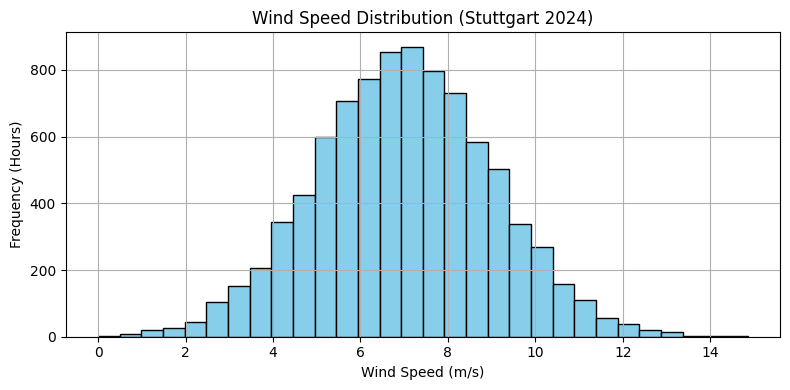

In [ ]:
import matplotlib.pyplot as plt

# === Visualization 1: Wind Speed Distribution ===
plt.figure(figsize=(8, 4))
plt.hist(wind_df["Wind_Speed_m_s"], bins=30, color='skyblue', edgecolor='black')
plt.title("Wind Speed Distribution (Stuttgart 2024)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency (Hours)")
plt.grid(True)
plt.tight_layout()
plt.show()


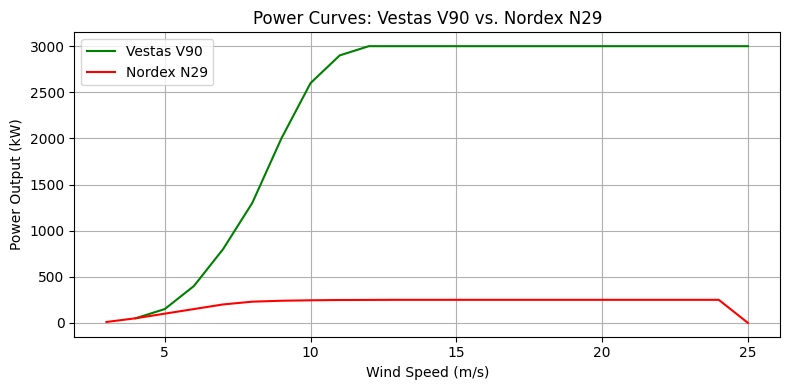

In [ ]:
# === Visualization 2: Power Curves Comparison ===
plt.figure(figsize=(8, 4))
plt.plot(vestas_curve["Wind_Speed_m_s"], vestas_curve["Power_kW"], label="Vestas V90", color="green")
plt.plot(nordex_curve["Wind_Speed_m_s"], nordex_curve["Power_kW"], label="Nordex N29", color="red")
plt.title("Power Curves: Vestas V90 vs. Nordex N29")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


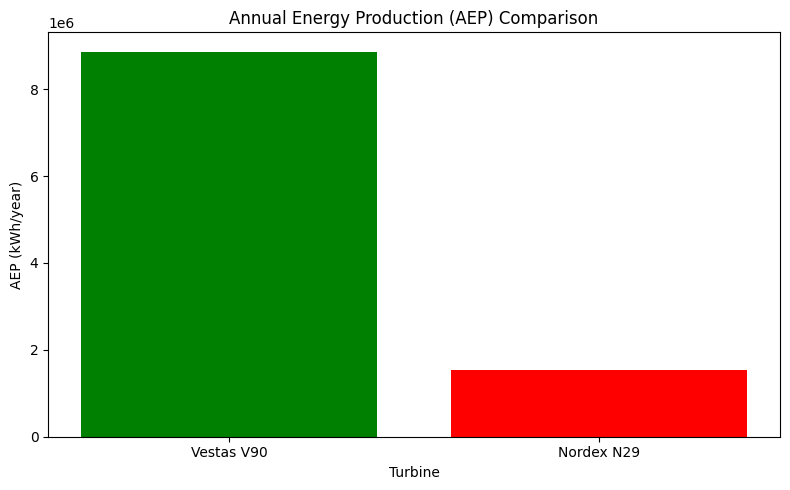

In [ ]:
import matplotlib.pyplot as plt

# Data for AEP (kWh/year)
turbines = ['Vestas V90', 'Nordex N29']
aep_values = [8863330, 1542970]

# Plot AEP Comparison
plt.figure(figsize=(8, 5))
plt.bar(turbines, aep_values, color=['green', 'red'])
plt.title("Annual Energy Production (AEP) Comparison")
plt.xlabel("Turbine")
plt.ylabel("AEP (kWh/year)")
plt.tight_layout()
plt.show()


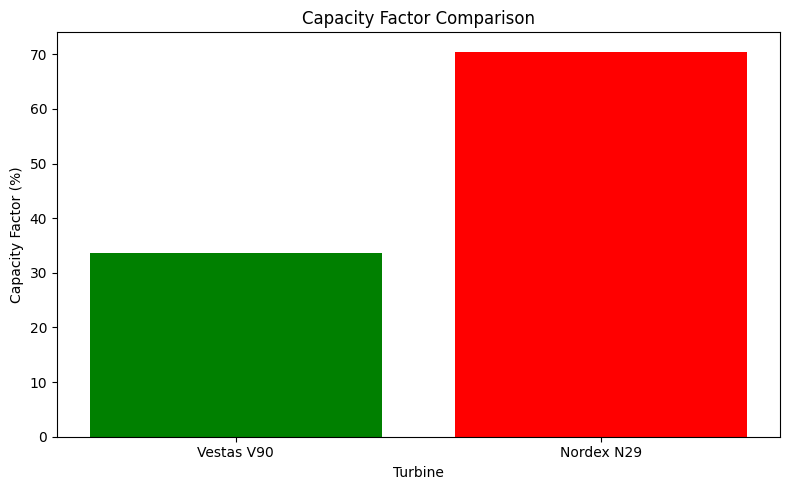

In [ ]:
# Data for Capacity Factor (%)
capacity_factors = [33.7, 70.5]

# Plot Capacity Factor Comparison
plt.figure(figsize=(8, 5))
plt.bar(turbines, capacity_factors, color=['green', 'red'])
plt.title("Capacity Factor Comparison")
plt.xlabel("Turbine")
plt.ylabel("Capacity Factor (%)")
plt.tight_layout()
plt.show()


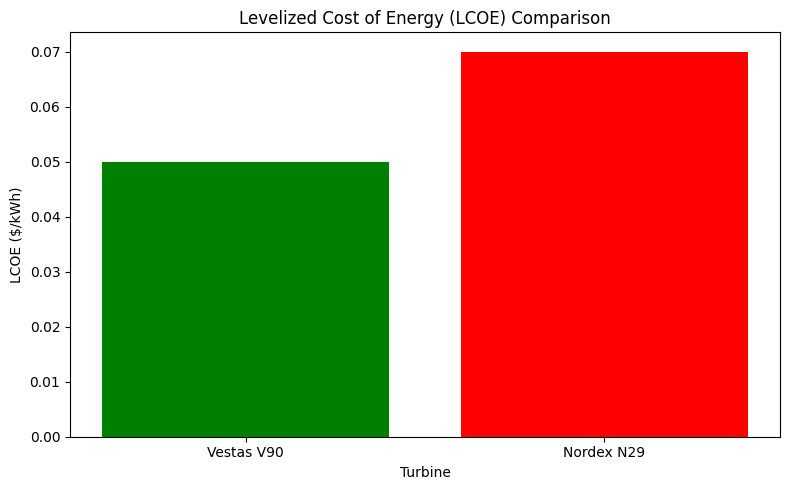

In [ ]:
# Data for LCOE ($/kWh)
lcoe_values = [0.05, 0.07]

# Plot LCOE Comparison
plt.figure(figsize=(8, 5))
plt.bar(turbines, lcoe_values, color=['green', 'red'])
plt.title("Levelized Cost of Energy (LCOE) Comparison")
plt.xlabel("Turbine")
plt.ylabel("LCOE ($/kWh)")
plt.tight_layout()
plt.show()


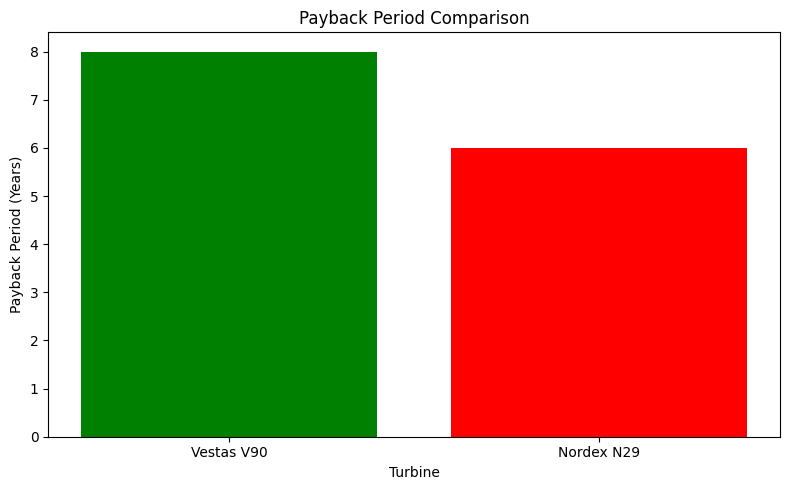

In [ ]:
# Data for Payback Period (years)
payback_period = [8, 6]

# Plot Payback Period Comparison
plt.figure(figsize=(8, 5))
plt.bar(turbines, payback_period, color=['green', 'red'])
plt.title("Payback Period Comparison")
plt.xlabel("Turbine")
plt.ylabel("Payback Period (Years)")
plt.tight_layout()
plt.show()


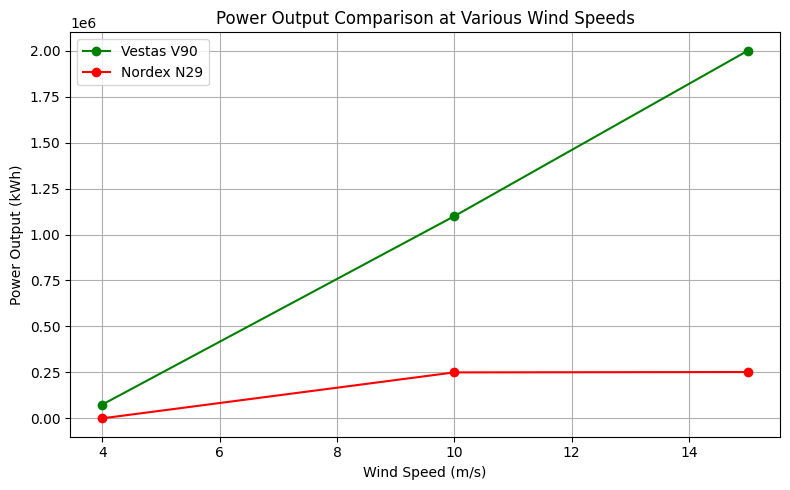

In [ ]:
import numpy as np

# Data for Wind Speeds and Power Output for both turbines
wind_speeds = np.array([4, 10, 15])
vestas_output = np.array([75000, 1100000, 2000000])
nordex_output = np.array([0, 250000, 252000])

# Plot Power Output Comparison at Various Wind Speeds
plt.figure(figsize=(8, 5))
plt.plot(wind_speeds, vestas_output, label="Vestas V90", color="green", marker='o')
plt.plot(wind_speeds, nordex_output, label="Nordex N29", color="red", marker='o')
plt.title("Power Output Comparison at Various Wind Speeds")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


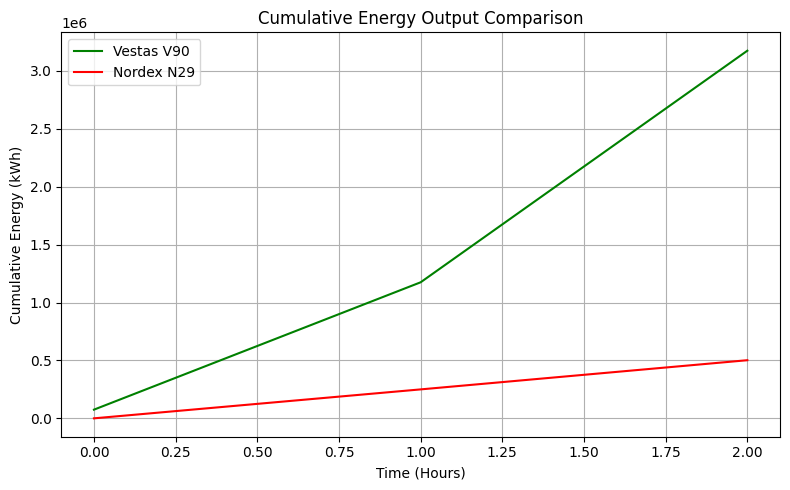

In [ ]:
# Data for cumulative energy output (assuming hourly data accumulation)
cumulative_vestas = np.cumsum(vestas_output)  # This would be over time
cumulative_nordex = np.cumsum(nordex_output)  # This would be over time

# Plot Cumulative Energy Output Comparison
plt.figure(figsize=(8, 5))
plt.plot(cumulative_vestas, label="Vestas V90", color="green")
plt.plot(cumulative_nordex, label="Nordex N29", color="red")
plt.title("Cumulative Energy Output Comparison")
plt.xlabel("Time (Hours)")
plt.ylabel("Cumulative Energy (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


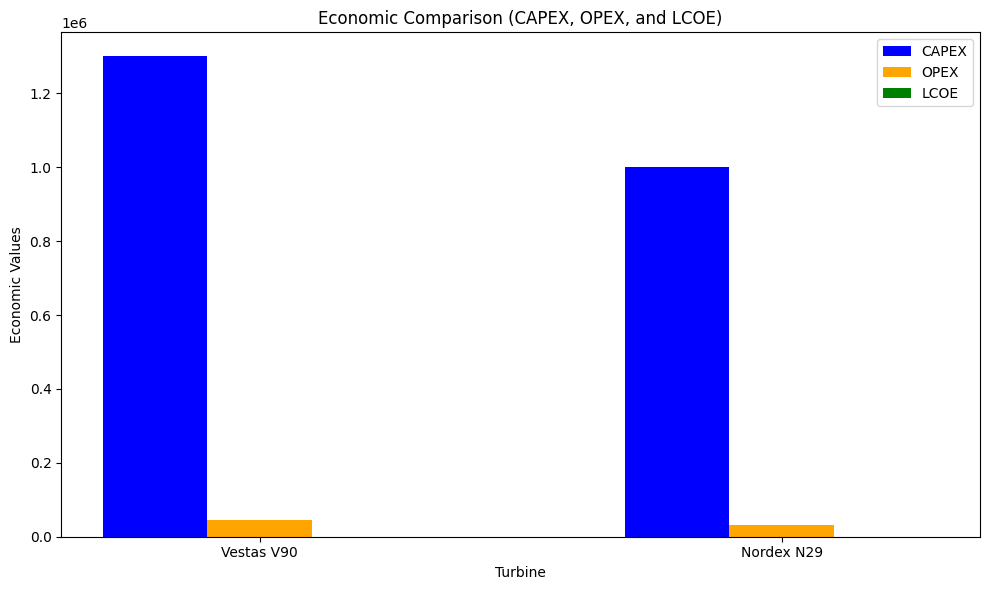

In [ ]:
# Data for CAPEX, OPEX, and LCOE
capex = [1300000, 1000000]
opex = [45000, 32000]
lcoe_economic = [0.05, 0.07]

# Plot Economic Comparison
x = np.arange(len(turbines))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting CAPEX, OPEX, and LCOE
ax.bar(x - width, capex, width, label='CAPEX', color='blue')
ax.bar(x, opex, width, label='OPEX', color='orange')
ax.bar(x + width, lcoe_economic, width, label='LCOE', color='green')

ax.set_xlabel('Turbine')
ax.set_ylabel('Economic Values')
ax.set_title('Economic Comparison (CAPEX, OPEX, and LCOE)')
ax.set_xticks(x)
ax.set_xticklabels(turbines)
ax.legend()

plt.tight_layout()
plt.show()


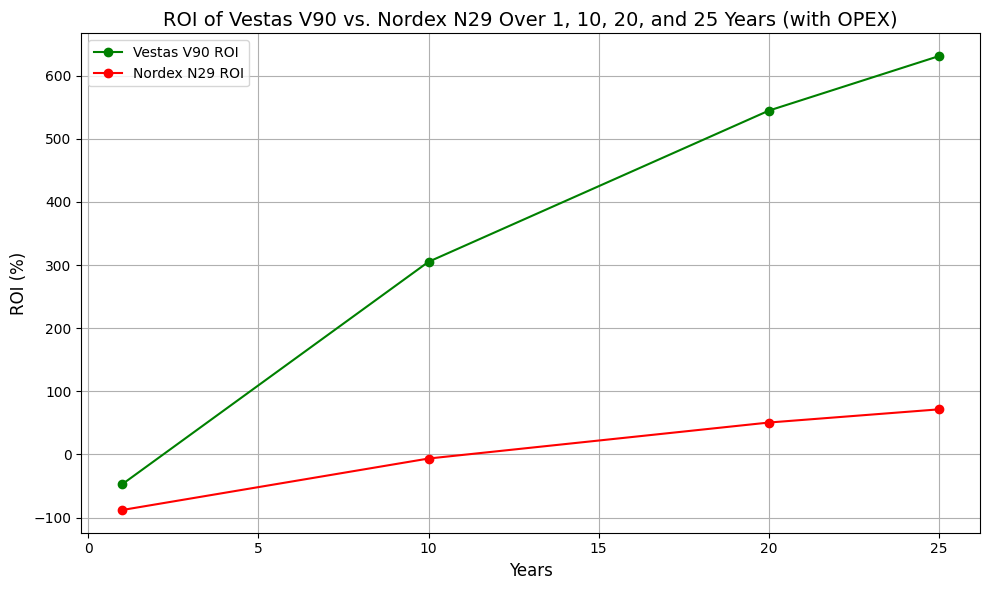

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Vestas V90 and Nordex N29 (Revenue and OPEX)
years = [1, 10, 20, 25]
vestas_revenue = [708906, 7089064, 14181328, 17726660]  # Cumulative revenue for each year
nordex_revenue = [123437, 1234376, 2468752, 3085940]  # Cumulative revenue for each year

# OPEX for each turbine (annual operational cost)
vestas_opex = 45000  # Example OPEX per year for Vestas V90
nordex_opex = 32000  # Example OPEX per year for Nordex N29

# Initial investments
vestas_investment = 1300000  # Example initial investment for Vestas V90
nordex_investment = 1000000  # Example initial investment for Nordex N29

# ROI Calculations considering OPEX for each year
vestas_roi = [
    ((revenue - vestas_investment - vestas_opex * year) / (vestas_investment + vestas_opex * year)) * 100
    for year, revenue in zip(years, vestas_revenue)
]

nordex_roi = [
    ((revenue - nordex_investment - nordex_opex * year) / (nordex_investment + nordex_opex * year)) * 100
    for year, revenue in zip(years, nordex_revenue)
]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(years, vestas_roi, label="Vestas V90 ROI", color='green', marker='o')
plt.plot(years, nordex_roi, label="Nordex N29 ROI", color='red', marker='o')

# Adding labels and title
plt.title("ROI of Vestas V90 vs. Nordex N29 Over 1, 10, 20, and 25 Years (with OPEX)", fontsize=14)
plt.xlabel("Years", fontsize=12)
plt.ylabel("ROI (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


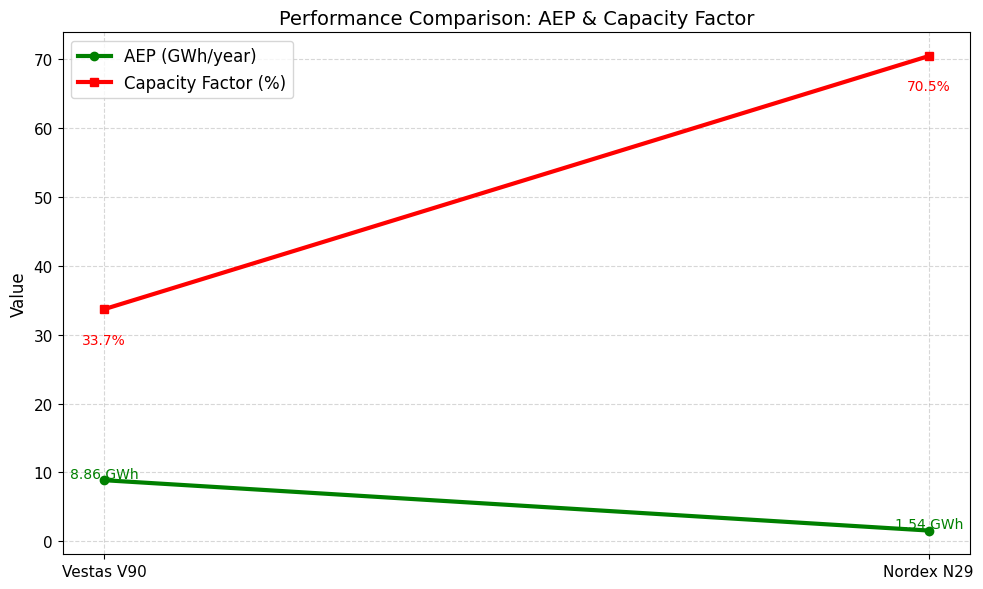

In [10]:
import matplotlib.pyplot as plt

# Data
turbines = ['Vestas V90', 'Nordex N29']
aep = [8.86, 1.54]  # GWh/year
capacity_factor = [33.7, 70.5]  # %

# Create the plot
plt.figure(figsize=(10, 6))

# Plot AEP
plt.plot(turbines, aep, color='green', marker='o', linewidth=3, label='AEP (GWh/year)')
for i, val in enumerate(aep):
    plt.text(i, val + 0.3, f'{val} GWh', ha='center', fontsize=10, color='green')

# Plot Capacity Factor
plt.plot(turbines, capacity_factor, color='red', marker='s', linewidth=3, label='Capacity Factor (%)')
for i, val in enumerate(capacity_factor):
    plt.text(i, val - 5, f'{val}%', ha='center', fontsize=10, color='red')

# Labels and layout
plt.title('Performance Comparison: AEP & Capacity Factor', fontsize=14)
plt.ylabel('Value', fontsize=12)
plt.xticks(turbines, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
